In [1]:
print(__doc__)

from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs

Automatically created module for IPython interactive environment


In [5]:
# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=300, centers=centers, cluster_std=0.5,
                            random_state=0)
print X

[[ 1.47504421  0.9243214 ]
 [-0.02204385 -0.80495334]
 [-1.17671587 -1.80823709]
 [ 0.77223375  1.00873958]
 [ 1.23283122  0.23187816]
 [-0.92174673 -0.88390948]
 [ 1.65956844 -1.44120941]
 [ 0.33389417 -1.98431234]
 [-1.27143074 -0.79197498]
 [ 1.33614738  1.20373092]
 [ 1.47123406 -1.13379737]
 [ 0.94839057  1.20529925]
 [ 0.65271607  0.92518273]
 [-0.11980203 -0.79925047]
 [ 1.26163833  0.91422683]
 [ 0.87899009 -0.24086941]
 [ 0.74124048 -1.48941493]
 [ 0.71534397 -0.86504782]
 [ 0.80238551 -1.57971026]
 [ 0.51444771 -0.8425914 ]
 [ 1.38051886  1.06083751]
 [ 0.42626567  0.78108998]
 [ 0.74517391  0.78096285]
 [ 0.78242322  1.92463186]
 [ 0.76657723 -1.70845306]
 [ 0.82604393  1.07817448]
 [ 1.1854125  -0.9289691 ]
 [-1.15450648 -1.8380019 ]
 [ 1.4002824  -0.96086991]
 [-0.85682816 -0.69557808]
 [-1.00784106 -0.91953592]
 [ 1.01850286 -0.6160488 ]
 [ 0.44780833  1.02608254]
 [-1.09532675 -1.19742476]
 [ 0.02409795 -1.32994586]
 [-1.7914692  -0.69481031]
 [-1.19972451 -0.81497206]
 

In [3]:
# #############################################################################
# Compute Affinity Propagation
af = AffinityPropagation(preference=-50).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels, metric='sqeuclidean'))

Estimated number of clusters: 3
Homogeneity: 0.872
Completeness: 0.872
V-measure: 0.872
Adjusted Rand Index: 0.912
Adjusted Mutual Information: 0.871
Silhouette Coefficient: 0.753


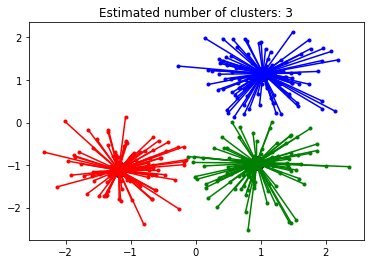

In [4]:
# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()